# **BigMart-Sales-Analysis**



# 1.  **Python Libraries**





In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy
import joblib



# **2.Read Data**



In [2]:
full_data=pd.read_csv('/content/Big_mart.csv')

# **3.Visulize Data**



In [3]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
full_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
full_data.shape

(8523, 12)

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
full_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
# Replacement of LF and low fat
full_data.Item_Fat_Content.replace(to_replace = ["LF", "low fat"],
                              value = ["Low Fat", "Low Fat"], inplace=True)

# Replacing reg into Regular
full_data.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"],
                              inplace = True)

<Axes: >

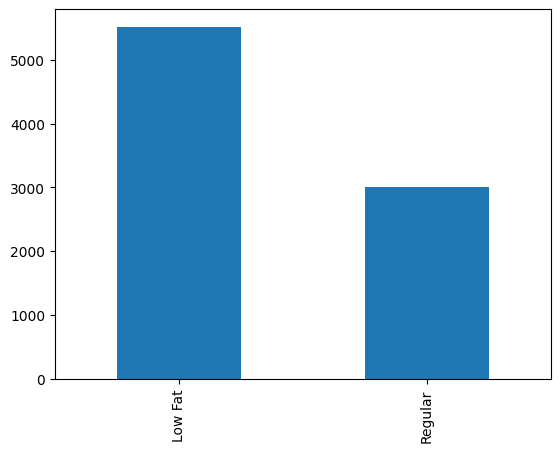

In [9]:
# Item Fat Content
full_data.Item_Fat_Content.value_counts().plot(kind = "bar")

<ipython-input-10-43a092b0d289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data.Item_Outlet_Sales, color = "r")


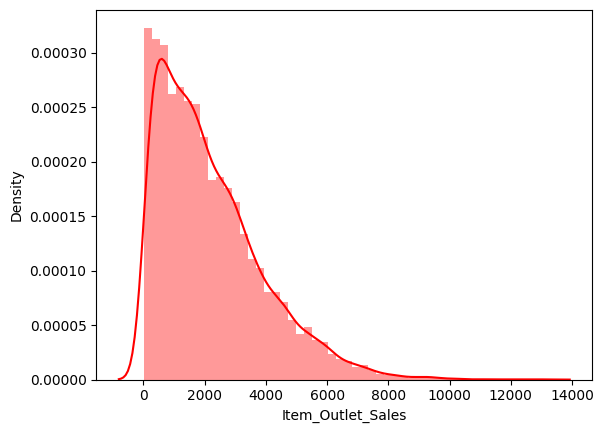

In [10]:
sns.distplot(full_data.Item_Outlet_Sales, color = "r")
plt.show()

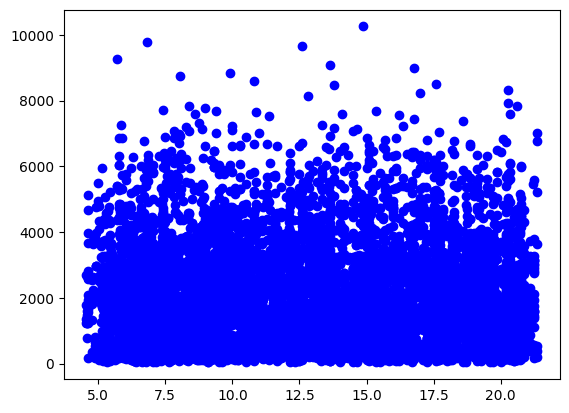

In [11]:
plt.scatter(full_data.Item_Weight, full_data.Item_Outlet_Sales, color = "blue")

In [12]:
# find if there are missing values in the dataset
full_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
mean=full_data.mean()
mean

<ipython-input-13-a87e8fdedb51>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=full_data.mean()


Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [14]:
mean.iloc[0]        # mean of Item_Weight

12.857645184135976

In [15]:
#filling the null values with the mean values in Item_Weight column
full_data['Item_Weight']=full_data['Item_Weight'].fillna(mean.iloc[0])
full_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [16]:
# fill the null values in Outlet_Size by 'loss'
full_data['Outlet_Size']= full_data['Outlet_Size'].fillna('loss')    #hint--->categorical variable cannot fill null values with mean
full_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,loss,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,loss,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,loss,Tier 2,Supermarket Type1,4710.5350


In [17]:
#check that all null values are handled
full_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
full_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
# fill the values in Item_Visibility column having 0 with the mean values
full_data['Item_Visibility'] = full_data['Item_Visibility'].replace(0,mean.iloc[1])
full_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,loss,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,loss,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,loss,Tier 2,Supermarket Type1,4710.5350


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

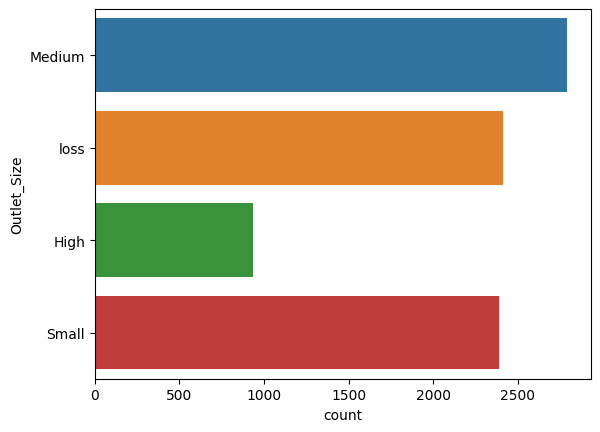

In [20]:
sns.countplot(y="Outlet_Size", data=full_data)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

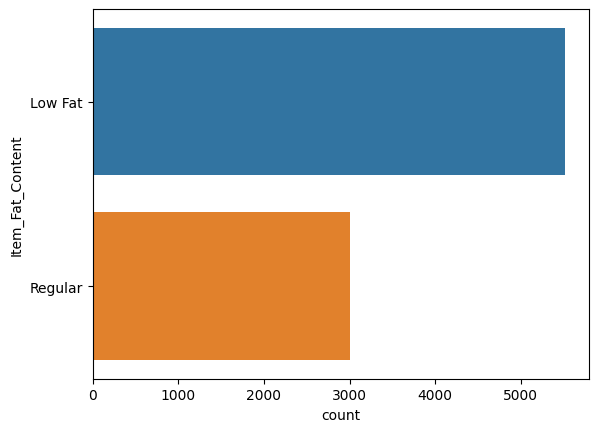

In [21]:
sns.countplot(y="Item_Fat_Content", data=full_data)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

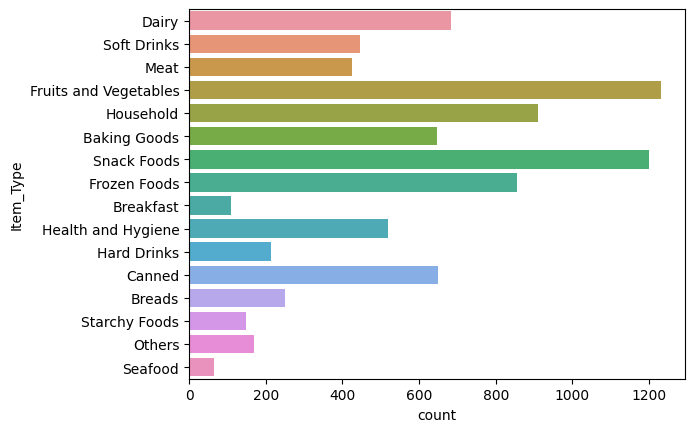

In [22]:
sns.countplot(y="Item_Type", data=full_data)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

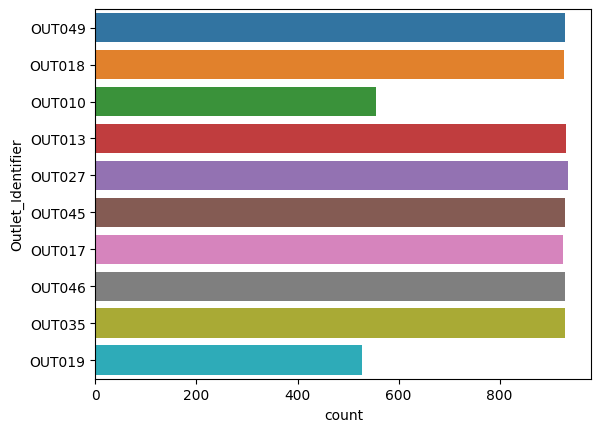

In [23]:
sns.countplot(y="Outlet_Identifier", data=full_data)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

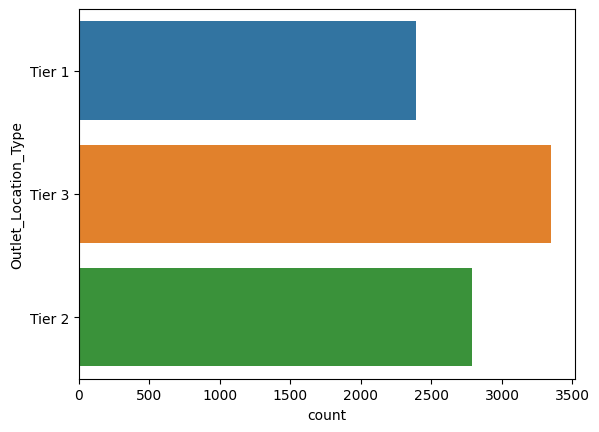

In [24]:
sns.countplot(y="Outlet_Location_Type", data=full_data)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

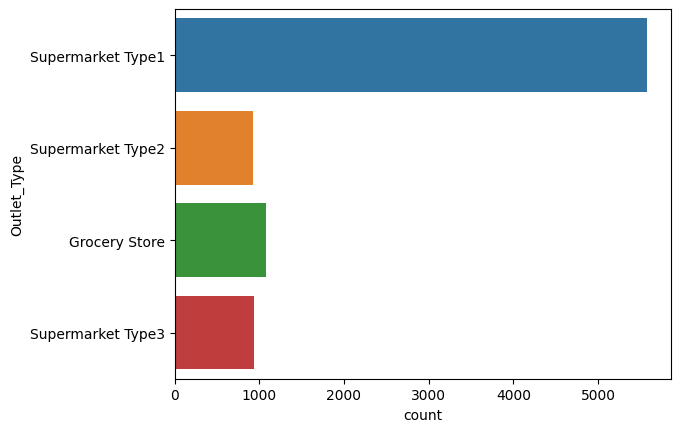

In [25]:
sns.countplot(y="Outlet_Type", data=full_data)
sns.despine

(array([1395., 1902., 1836., 1079.,  730.,  617.,  387.,  324.,  115.,
          42.,   31.,   19.,   17.,   23.,    6.]),
 array([0.0035747 , 0.02522911, 0.04688353, 0.06853795, 0.09019236,
        0.11184678, 0.1335012 , 0.15515561, 0.17681003, 0.19846445,
        0.22011886, 0.24177328, 0.2634277 , 0.28508211, 0.30673653,
        0.32839095]),
 <BarContainer object of 15 artists>)

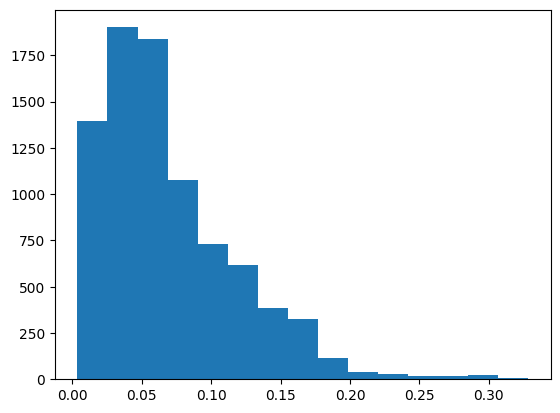

In [26]:
plt.hist(x='Item_Visibility', data=full_data, bins=15)

In [27]:
full_data.corr()

<ipython-input-27-183b3e189078>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


<ipython-input-28-d97f7c6ad1d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full_data.corr(),annot=True)


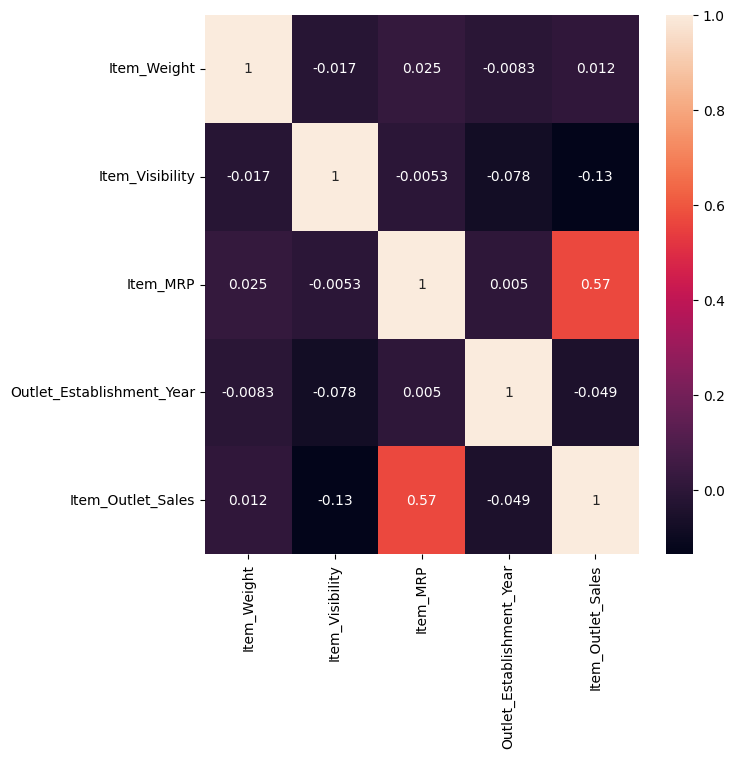

In [28]:
plt.figure(figsize =(7,7))
sns.heatmap(full_data.corr(),annot=True)
plt.show()

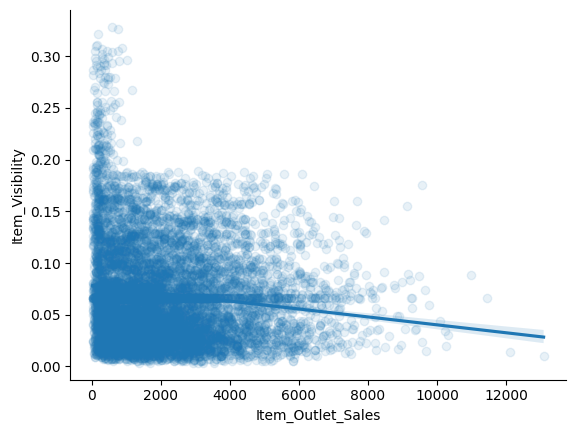

In [29]:
sns.regplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = full_data , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

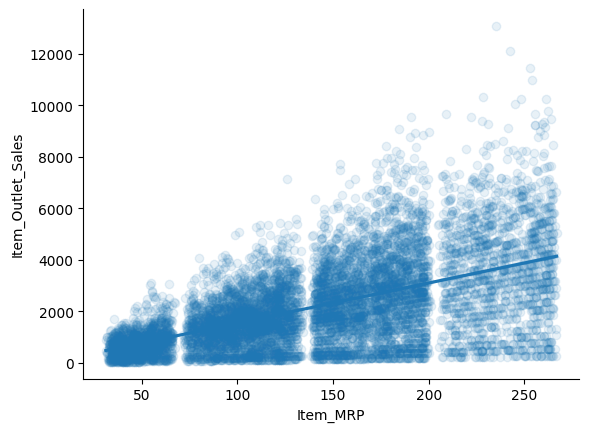

In [30]:
sns.regplot(x = 'Item_MRP',y ='Item_Outlet_Sales',data = full_data , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

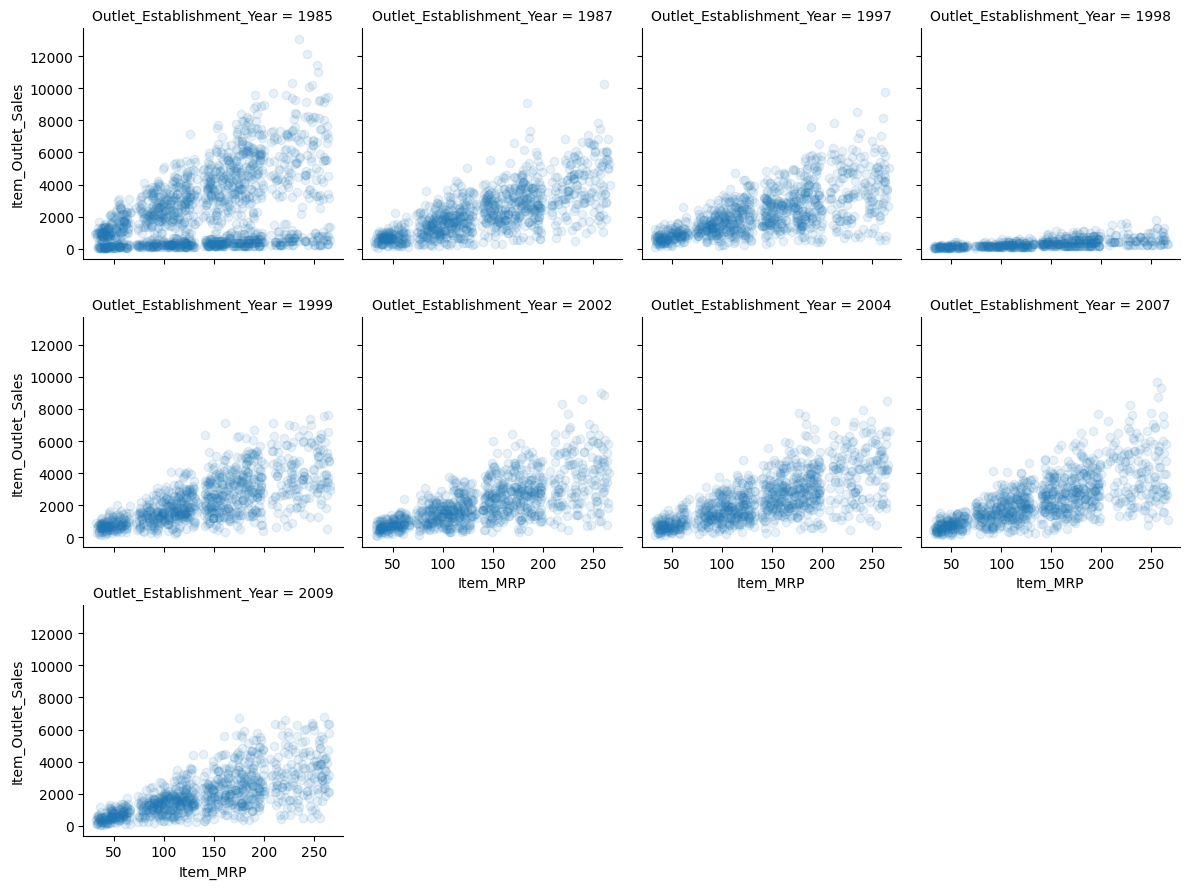

In [31]:
grid = sns.FacetGrid(full_data, col='Outlet_Establishment_Year',col_wrap = 4)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.1)
sns.despine()

In [32]:
# One-hot encode the categorical variables in the dataset into numeric one
var=['Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size']
encoder=LabelEncoder()
for i in var:
  full_data[i]= encoder.fit_transform(full_data[i])
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.066132,Household,53.8614,1,1987,0,2,1,994.7052


In [33]:
dum = pd.get_dummies(full_data['Outlet_Identifier'])
df1 = pd.concat([full_data,dum],axis=1)

label = df1['Item_Outlet_Sales']

train = df1.drop(columns=['Item_Identifier','Item_Weight','Item_Outlet_Sales','Item_Type','Outlet_Establishment_Year'])

In [34]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,0,1,2,3,4,5,6,7,8,9
0,0,0.016047,249.8092,9,1,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0.019278,48.2692,3,1,2,2,0,0,0,1,0,0,0,0,0,0
2,0,0.016760,141.6180,9,1,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.066132,182.0950,0,3,2,0,1,0,0,0,0,0,0,0,0,0
4,0,0.066132,53.8614,1,0,2,1,0,1,0,0,0,0,0,0,0,0


In [35]:
label

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [36]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.30,random_state = 101)

In [37]:
x_train.shape

(5966, 17)

In [38]:
x_test.shape

(2557, 17)

In [39]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# **Models**

# Linear Regression

In [40]:
Linearmodel= LinearRegression()
#fitting model
Linearmodel.fit(x_train,y_train)

LinearRegression()

In [41]:
pred=Linearmodel.predict(x_test)
pred

array([1325.30674998, 2424.92049129, 1312.06792943, ..., 1546.99540847,
       2954.83647376, 3722.00612306])

In [42]:
#accuracy of the linear regression model
Linearmodel.score(x_test,y_test)*100

56.896398963067305

# GradientBoostingRegressor

In [43]:
gradModel = GradientBoostingRegressor(n_estimators = 100)

In [44]:
#fitting model
gradModel.fit(x_train,y_train)

GradientBoostingRegressor()

In [45]:
#accuracy of the GradientBoostingRegressor model
gradModel.score(x_test, y_test)*100

60.735097194752456

# RandomForestRegressor

In [46]:
randomModel = RandomForestRegressor(n_estimators = 50)
#fitting model
randomModel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [47]:
#accuracy of the RandomForestRegressor model
randomModel.score(x_test, y_test)*100

53.501513741512156

# **Save The Model**

In [54]:
joblib.dump(gradModel,'/content/BigMartSalesAnalysis.h5')

['/content/BigMartSalesAnalysis.h5']